# 张量可视化

## 方案一：使用opencv读取图片




img_original    type: ndarray; 	shape:(316, 474, 3)
img_transposed  type: ndarray; 	shape:(3, 316, 474)


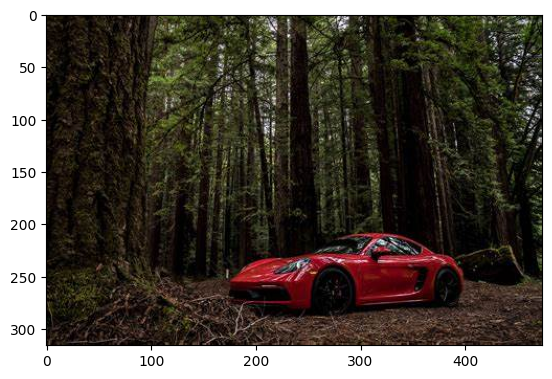

img_totensor  type: Tensor; 	shape:torch.Size([3, 316, 474])
img_resized  type: Tensor; 	shape:torch.Size([3, 288, 288])


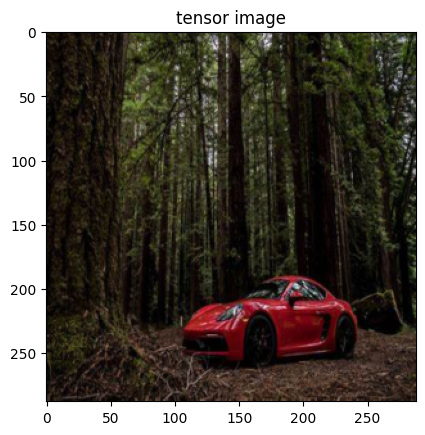

In [3]:

import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.transforms import Resize
from torch import nn
import cv2 as cv


# 1. 读取图片
img_path = './test.jpg'
img_bgr = cv.imread(img_path) # ndarray
print(f'img_original    type: {type(img_bgr).__name__}; \tshape:{img_bgr.shape}')
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB) # shape = [H, W, C]
img_array = img_rgb.transpose(2, 0, 1) # shape = [H, W, C] -> [C, H, W],
print(f'img_transposed  type: {type(img_array).__name__}; \tshape:{img_array.shape}')


# # 2. 可视化图片
plt.imshow(img_rgb)  # 可视化之前要将 shape = [C, H, W] -> [H, W, C] 
plt.show()

# # 3. 将图片转换为tensor
img_tensor = torch.tensor(img_array)

print(f'img_totensor  type: {type(img_tensor).__name__}; \tshape:{img_tensor.shape}')

# # # 4. 对图片进行resize（3， 288， 288）
# img_resized = torch.nn.functional.interpolate(img_tensor.unsqueeze(0), size=(3, 288, 288))
torch_resize = Resize([288, 288])
img_resized = torch_resize(img_tensor)
print(f'img_resized  type: {type(img_resized).__name__}; \tshape:{img_resized.shape}')


# # 5. 对转换之后的图片进行可视化(tensor to pil 可视化)

def visualize_tensor(img_input):
    # 张量维度 4 -> 3
    if img_input.dim() == 4:
        img_input = img_input.squeeze(0) # [1, 3, x, x] -> [3, x, x]
    
    # 将张量的数据类型转换为uint8
    img_input = img_input.to(torch.uint8)
        
    img_permuted = img_input.permute(1, 2, 0)  # 从 [C, H, W] 变为 [H, W, C]
    # 如果张量需要梯度，则先分离
    if img_permuted.requires_grad:
        img_permuted = img_permuted.detach()
    
    img_resized_array = img_permuted.numpy()
    # print(f'img_resized_array  type: {type(img_resized_array).__name__}; \tshape:{img_resized_array.shape}')
    img_resized_pil = Image.fromarray(img_resized_array)
    # print(f'img_resized_pil  type: {type(img_resized_pil).__name__}; \tshape:{img_resized_pil.size}')
    plt.imshow(img_resized_pil)
    plt.title('tensor image')
    plt.show()

visualize_tensor(img_resized)

# # 6. 对图片进行卷积操作（转置卷积 和 常规卷积）
ConvTranspose = nn.ConvTranspose2d(in_channels=3, out_channels=3, kernel_size=5, stride=2, padding=2)
Conv2d = nn.Conv2d(in_channels = 3, out_channels = 3, kernel_size = 5, stride = 2, padding = 2)
# # 初始化权重为随机值
# conv_transpose2d.weight.data = torch.rand(conv_transpose2d.weight.data.shape)




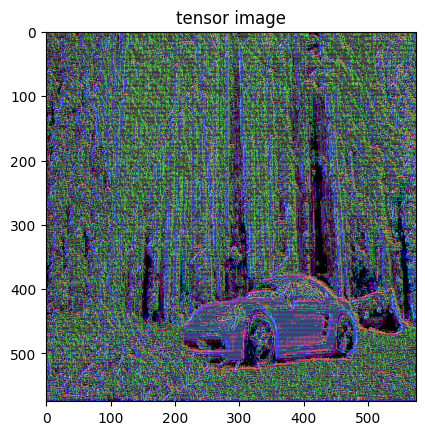

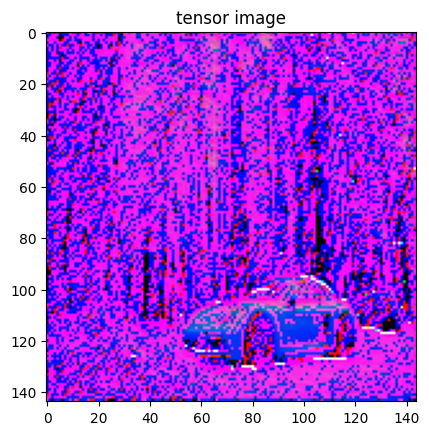

In [4]:
# # 对图片进行转置卷积
img_upsampled = ConvTranspose(img_resized.float().unsqueeze(0))  # 转换为浮点类型，并增加batch通道
img_downsampled = Conv2d(img_resized.float().unsqueeze(0))

# # 7. 对结果图片进行可视化
visualize_tensor(img_upsampled)
visualize_tensor(img_downsampled)

## 方案二：使用Image读取图片

(316, 474, 3)


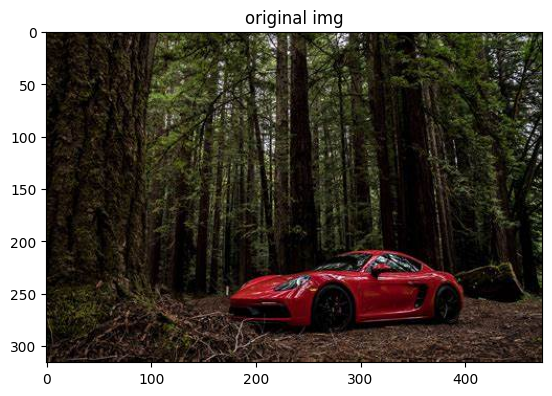

(3, 316, 474)
torch.Size([3, 288, 288])


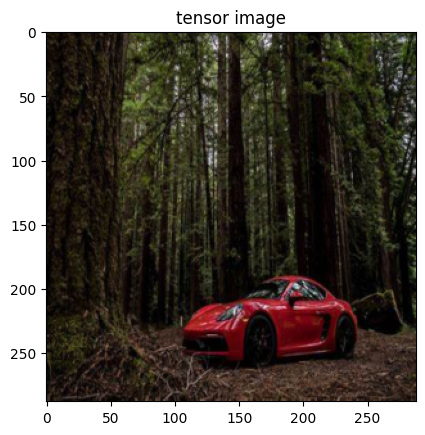

In [5]:
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import Resize


img_path = './test.jpg'
img_input = Image.open(img_path)
img_rgb = img_input.convert('RGB')
img_array = np.array(img_rgb)

print(img_array.shape)
plt.imshow(img_array)
plt.title('original img')
plt.show()

img_array = img_array.transpose(2, 0, 1)
print(img_array.shape)

img_tensor = torch.tensor(img_array)
resize_tensor = Resize([288, 288])
img_resized = resize_tensor(img_tensor)
print(img_resized.shape)


visualize_tensor(img_resized)



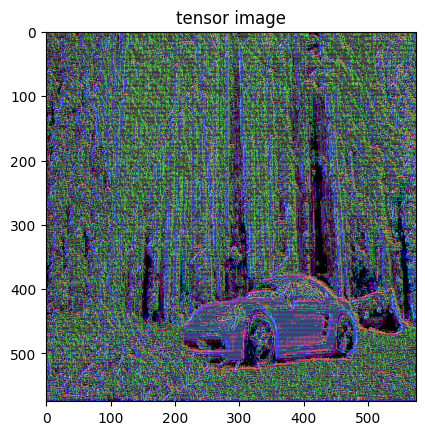

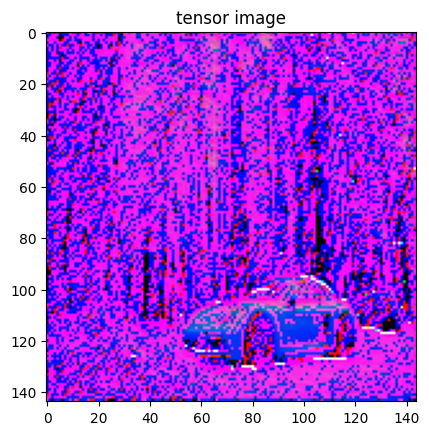

In [6]:
# # 对图片进行转置卷积
img_upsampled = ConvTranspose(img_resized.float().unsqueeze(0))  # 转换为浮点类型，并增加batch通道
img_downsampled = Conv2d(img_resized.float().unsqueeze(0))
    
# # 7. 对结果图片进行可视化
visualize_tensor(img_upsampled)
visualize_tensor(img_downsampled)

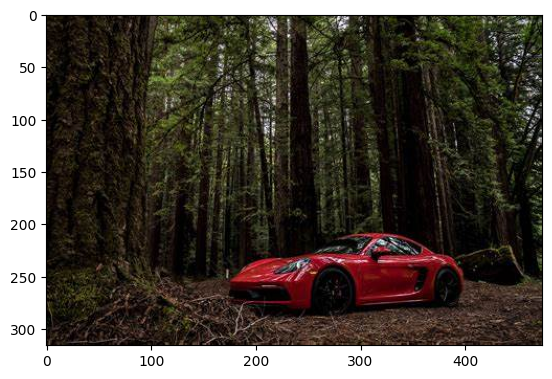

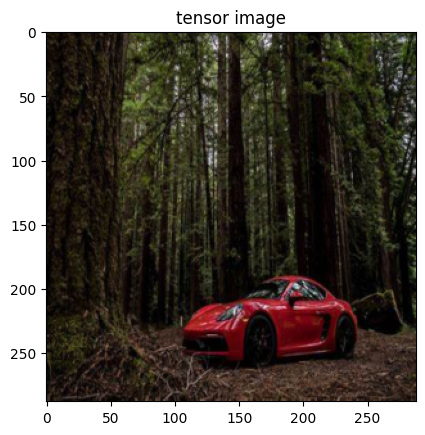

In [7]:
def read_img_PIL(img_path):
    img_input = Image.open(img_path)
    img_rgb = img_input.convert('RGB')
    img_array = np.array(img_rgb)
    # img_array = img_array.transpose(2, 0, 1)
    return img_array

def pilToTensor(img_array):
    img_array = img_array.transpose(2, 0, 1)
    img_tensor = torch.tensor(img_array)
    return img_tensor

def resize_tensor(img_tensor):
    resize_tensor = Resize([288, 288])
    img_resized = resize_tensor(img_tensor)
    return img_resized

img_array = read_img_PIL('./test.jpg')
img_tensor = pilToTensor(img_array)
img_tensor = resize_tensor(img_tensor)

plt.imshow(img_array)
plt.show()
visualize_tensor(img_tensor)


## 整合模块

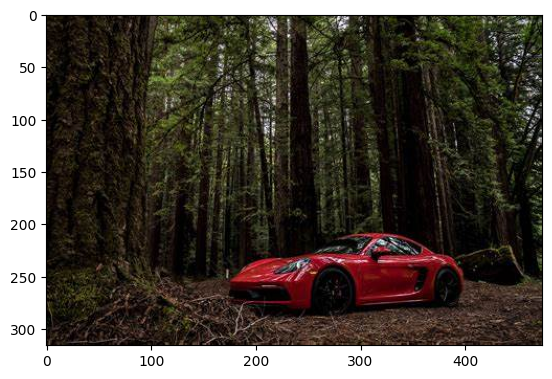

pil to tensor finished
tensor shape：torch.Size([3, 316, 474])
tensor resize finished
tensor shape：torch.Size([3, 288, 288])


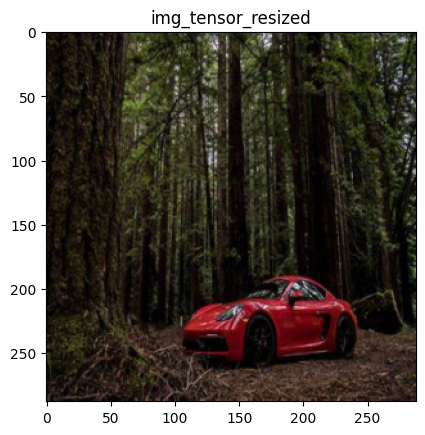

img_tensor_resized  type: ndarray; 	shape:(288, 288, 3)


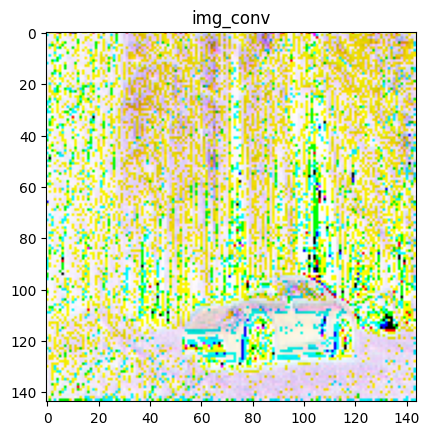

img_conv  type: ndarray; 	shape:(144, 144, 3)


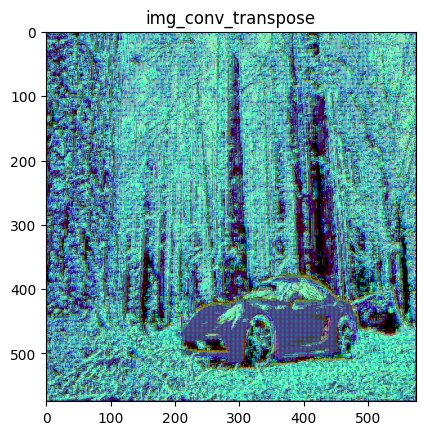

img_conv_transpose  type: ndarray; 	shape:(575, 575, 3)


In [10]:
'''
# -*- coding: UTF-8 -*-
    @Description:        尝试对卷积过程之后的Tensor进行可视化，分别尝试了卷积和卷积
    @Author:             Junyin Xiong
    @Date:               2024/05/25
    @LastEditTime:       2024/05/25 16:15:26
    @LastEditors:        Junyin Xiong
'''
import torch
import numpy as np
import cv2 as cv

from torchvision.transforms import Resize
from torch import nn
from PIL import Image
from matplotlib import pyplot as plt

def read_img_PIL(img_path):
    img_input = Image.open(img_path)
    img_rgb = img_input.convert('RGB')
    img_array = np.array(img_rgb)
    # img_array = img_array.transpose(2, 0, 1)
    return img_array

def read_img_cv(img_path):
    img_bgr = cv.imread(img_path)
    img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
    img_array = np.array(img_rgb)
    return img_array

def pilToTensor(img_array):
    img_array = img_array.transpose(2, 0, 1)
    img_tensor = torch.tensor(img_array)
    print('pil to tensor finished')
    print(f'tensor shape：{img_tensor.shape}')
    return img_tensor

def resize_tensor(img_tensor):
    resize_tensor = Resize([288, 288])
    img_resized = resize_tensor(img_tensor)
    print('tensor resize finished')
    print(f'tensor shape：{img_resized.shape}')
    return img_resized

def visualize_tensor(img_input, title=None, save_path=None):
    save_path = f"{title}.jpg"
    # 张量维度 4 -> 3
    if img_input.dim() == 4:
        img_input = img_input.squeeze(0)

    img_input = img_input.to(torch.uint8)       # 将张量的数据类型转换为uint8
    img_permuted = img_input.permute(1, 2, 0)   # 从 [C, H, W] 变为 [H, W, C]
    
    # 如果张量需要梯度，则先分离
    if img_permuted.requires_grad:
        img_permuted = img_permuted.detach()
    
    img_resized_array = img_permuted.numpy() 
    img_resized_pil = Image.fromarray(img_resized_array)
    # print(f'img_resized_pil  type: {type(img_resized_pil).__name__}; \tshape:{img_resized_pil.size}')
    plt.imshow(img_resized_pil)
    plt.title(title)
    plt.imsave(save_path, img_resized_array)
    plt.show()
    print(f'{title}  type: {type(img_resized_array).__name__}; \tshape:{img_resized_array.shape}')
    
def Conv(img):
    conv2d = nn.Conv2d(3, 3, kernel_size=5, stride=2, padding=2) # (288 - 5 + 2*2)/2+1=144
    out = conv2d(img)
    return out

def ConvTranspose(img):
    ConvTranspose2d = nn.ConvTranspose2d(3, 3, kernel_size=5, stride=2, padding=2) # (288-1)x2-2x2+5 = 575
    out = ConvTranspose2d(img)
    return out


if __name__ == '__main__':
    img_path = 'test.jpg'
    img_array = read_img_PIL(img_path)
    # img_array = read_img_cv(img_path)
    plt.imshow(img_array)
    plt.show()
    img_tensor = pilToTensor(img_array)
    img_tensor_resized = resize_tensor(img_tensor)
    img_conv = Conv(img_tensor_resized.float()) # 卷积操作需要
    img_conv_transpose = ConvTranspose(img_tensor_resized.float())
    visualize_tensor(img_tensor_resized, 'img_tensor_resized')
    visualize_tensor(img_conv, 'img_conv')
    visualize_tensor(img_conv_transpose, 'img_conv_transpose')
    